In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📄 Metadata Dataset: `pl_shooting.csv`

| STT | Display column name | `data-stat` (raw)            | Standardized column name            | Short description                              |
| --- | ------------------- | ---------------------------- | ----------------------------------- | ---------------------------------------------- |
| 1   | Squad               | `Unnamed: 0_level_0_Squad`   | team                                | Team name                                       |
| 2   | # Pl                | `Unnamed: 1_level_0_# Pl`    | players_used                        | Number of players used                          |
| 3   | 90s                 | `Unnamed: 2_level_0_90s`     | minutes_90s                         | Total minutes played (converted to 90s)         |
| 4   | Gls                 | `Standard_Gls`               | goals                               | Total goals                                     |
| 5   | Sh                  | `Standard_Sh`                | shots                               | Total shots (excluding penalties)               |
| 6   | SoT                 | `Standard_SoT`               | shots_on_target                     | Shots on target                                 |
| 7   | SoT%                | `Standard_SoT%`              | shots_on_target_pct                 | Shot-on-target rate (%)                         |
| 8   | Sh/90               | `Standard_Sh/90`             | shots_per90                         | Shots per 90                                     |
| 9   | SoT/90              | `Standard_SoT/90`            | shots_on_target_per90               | Shots on target per 90                          |
| 10  | G/Sh                | `Standard_G/Sh`              | goals_per_shot                      | Goals per shot                                  |
| 11  | G/SoT               | `Standard_G/SoT`             | goals_per_shot_on_target            | Goals per shot on target                         |
| 12  | Dist               | `Standard_Dist`              | average_shot_distance               | Average shot distance (yards)                   |
| 13  | FK                 | `Standard_FK`                | shots_free_kicks                    | Free-kick shots                                 |
| 14  | PK                 | `Standard_PK`                | pens_made                           | Penalties scored                                |
| 15  | PKatt              | `Standard_PKatt`             | pens_att                            | Penalties attempted                             |
| 16  | xG                 | `Expected_xG`                | xg                                  | Expected Goals (including penalties)            |
| 17  | npxG               | `Expected_npxG`              | npxg                                | Non-penalty Expected Goals                      |
| 18  | npxG/Sh            | `Expected_npxG/Sh`           | npxg_per_shot                       | Non-penalty xG per shot                         |
| 19  | G-xG               | `Expected_G-xG`              | goals_minus_xg                      | Goals minus xG                                  |
| 20  | np:G-xG            | `Expected_np:G-xG`           | non_penalty_goals_minus_npxg        | Non-penalty goals minus non-penalty xG          |
| 21  | Season             | `Season`                     | season                              | Season                                          |
| 22  | Stat Type          | `StatType`                   | stattype                            | Stat type (shooting)                            |


#Checking data structures

In [ ]:
df.shape

(60, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   team                          60 non-null     object 
 1   players_used                  60 non-null     int64  
 2   minutes_90s                   60 non-null     float64
 3   goals                         60 non-null     int64  
 4   shots                         60 non-null     int64  
 5   shots_on_target               60 non-null     int64  
 6   shots_on_target_pct           60 non-null     float64
 7   shots_per90                   60 non-null     float64
 8   shots_on_target_per90         60 non-null     float64
 9   goals_per_shot                60 non-null     float64
 10  goals_per_shot_on_target      60 non-null     float64
 11  average_shot_distance         60 non-null     float64
 12  shots_free_kicks              60 non-null     int64  
 13  pens_ma

In [ ]:
df.describe()

,players_used,minutes_90s,goals,shots,shots_on_target,shots_on_target_pct,shots_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,average_shot_distance,shots_free_kicks,pens_made,pens_att,xg,npxg,npxg_per_shot,goals_minus_xg,non_penalty_goals_minus_npxg
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000,60.000000,60.000000
mean,27.033333,30.633333,45.133333,398.566667,134.400000,33.475000,12.788667,4.289667,0.104333,0.311667,16.673333,10.933333,3.283333,3.833333,44.57000,41.591667,0.106000,0.563333,0.258333
std,3.817740,10.507409,21.530795,168.789044,59.739321,2.523491,2.433630,0.920711,0.020450,0.050763,0.806303,5.850878,2.504854,2.744280,20.37972,18.877799,0.011527,5.851987,5.622150
min,19.000000,15.000000,8.000000,137.000000,43.000000,27.300000,8.560000,2.690000,0.050000,0.160000,14.900000,1.000000,0.000000,0.000000,13.30000,11.800000,0.080000,-14.000000,-13.600000
25%,24.000000,16.000000,24.000000,219.000000,68.750000,32.050000,11.335000,3.610000,0.090000,0.280000,16.200000,7.000000,2.000000,2.000000,26.12500,23.875000,0.100000,-2.800000,-2.900000
50%,26.500000,38.000000,48.000000,439.500000,149.000000,33.550000,12.725000,4.255000,0.100000,0.320000,16.700000,10.000000,3.000000,3.000000,46.85000,44.200000,0.100000,0.450000,0.250000
75%,30.000000,38.000000,58.750000,524.500000,177.250000,35.600000,14.200000,4.832500,0.120000,0.340000,17.225000,15.000000,4.250000,5.000000,58.85000,55.775000,0.110000,4.175000,3.800000
max,36.000000,38.000000,94.000000,781.000000,264.000000,39.900000,20.550000,6.950000,0.160000,0.470000,18.600000,25.000000,11.000000,12.000000,87.80000,80.400000,0.130000,13.500000,12.100000


In [ ]:
df.dtypes

,0
team,object
players_used,int64
minutes_90s,float64
goals,int64
shots,int64
shots_on_target,int64
shots_on_target_pct,float64
shots_per90,float64
shots_on_target_per90,float64
goals_per_shot,float64


In [ ]:
df.sample(5)

,team,players_used,minutes_90s,goals,shots,shots_on_target,shots_on_target_pct,shots_per90,shots_on_target_per90,goals_per_shot,...,shots_free_kicks,pens_made,pens_att,xg,npxg,npxg_per_shot,goals_minus_xg,non_penalty_goals_minus_npxg,season,stattype
31,Liverpool,24,38.0,85,639,215,33.6,16.82,5.66,0.12,...,11,9,9,82.2,75.2,0.12,2.8,0.8,2024-2025,shooting
28,Fulham,26,38.0,53,516,167,32.4,13.58,4.39,0.10,...,10,3,4,49.0,45.9,0.09,4.0,4.1,2024-2025,shooting
18,West Ham,27,16.0,18,161,55,34.2,10.06,3.44,0.11,...,3,1,1,16.3,15.5,0.10,1.7,1.5,2025-2026,shooting
54,Newcastle Utd,32,38.0,83,542,196,36.2,14.26,5.16,0.14,...,9,8,9,76.0,69.0,0.13,7.0,6.0,2023-2024,shooting
5,Burnley,24,16.0,18,138,51,37.0,8.62,3.19,0.12,...,9,2,2,14.5,12.9,0.10,3.5,3.1,2025-2026,shooting


In [ ]:
df.duplicated(subset=["season","team"]).sum()

(df[["goals","xg","npxg","shots_per90","xg","npxg"]] < 0).sum()

df["shots_on_target_pct"].between(0, 100).all()

np.True_

In [ ]:
df.isna().sum()

,0
team,0
players_used,0
minutes_90s,0
goals,0
shots,0
shots_on_target,0
shots_on_target_pct,0
shots_per90,0
shots_on_target_per90,0
goals_per_shot,0


#Univariate Analysis

In [ ]:
df["season"] = df["season"].astype("category")
df["season"] = df["season"].cat.set_categories(
    ["2023-2024", "2024-2025", "2025-2026"],
    ordered=True
)

df["season"].value_counts().sort_index()


,count
season,
2023-2024,20
2024-2025,20
2025-2026,20


In [ ]:
num_cols = [
    "shots_per90",
    "shots_on_target_per90",
    "shots_on_target_pct",
]


In [ ]:
season_summary = (
    df
    .groupby("season")[num_cols]
    .agg(["mean", "median", "min", "max"])
    .round(3)
)

season_summary


shots_per90                      shots_on_target_per90               \
                 mean  median   min    max                  mean median   min   
season                                                                          
2023-2024      13.660  13.355  9.47  20.55                 4.670  4.610  3.08   
2024-2025      12.852  13.220  8.74  16.82                 4.322  4.405  2.76   
2025-2026      11.854  11.810  8.56  15.80                 3.878  3.940  2.69   

                shots_on_target_pct                     
            max                mean median   min   max  
season                                                  
2023-2024  6.95              34.060  33.75  30.2  38.7  
2024-2025  5.66              33.600  33.50  29.0  39.9  
2025-2026  5.06              32.765  33.30  27.3  37.0

* **Season 2023–2024**: This season shows the **highest shooting intensity** of the three, with both `shots_per90` and `shots_on_target_per90` at their peak. `shots_on_target_pct` is also relatively strong, indicating teams not only shot more often but also maintained fairly solid accuracy.

* **Season 2024–2025**: Shooting indicators **decline slightly** versus the prior season, especially shots and shots on target per 90. However, `shots_on_target_pct` is nearly unchanged, suggesting **finishing accuracy is largely maintained** despite a more cautious attacking volume.

* **Season 2025–2026**: This season records the **lowest shooting levels**, with clear drops in both `shots_per90` and `shots_on_target_per90`. `shots_on_target_pct` also dips slightly, implying not only fewer shots but also a mild decline in **shooting efficiency**—consistent with an incomplete season where the data reflects only the early phase.


#shots_per90

<Figure size 600x400 with 0 Axes>

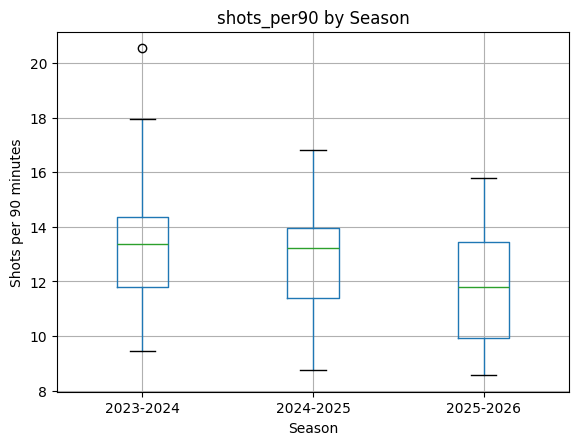

In [ ]:
plt.figure(figsize=(6, 4))
df.boxplot(
    column="shots_per90",
    by="season",
    grid=True
)

plt.title("shots_per90 by Season")
plt.suptitle("")
plt.xlabel("Season")
plt.ylabel("Shots per 90 minutes")

plt.show()

* **Season 2023–2024**: The boxplot shows the highest median `shots_per90`, with a relatively wide IQR—indicating meaningful differences in shooting volume across teams. A clear **upper outlier** (above ~20 shots per 90) suggests at least one team played at an exceptionally high attacking tempo, far above the league baseline.

* **Season 2024–2025**: The median dips slightly and the IQR narrows, implying a more uniform shooting volume across teams. No strong outliers appear, suggesting most teams cluster within a tighter range without extreme high/low cases.

* **Season 2025–2026**: The median drops again and the whole distribution shifts lower. The boxplot shows **no notable outliers**, indicating relatively similar shooting intensity across teams in the early-season sample. This should be interpreted cautiously because the season is incomplete and the distribution may change as more matches are played.


#shots_on_target_per90

<Figure size 600x400 with 0 Axes>

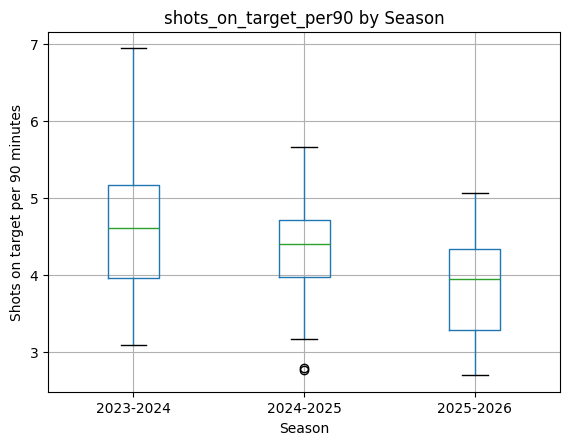

In [ ]:
plt.figure(figsize=(6, 4))
df.boxplot(
    column="shots_on_target_per90",
    by="season",
    grid=True
)

plt.title("shots_on_target_per90 by Season")
plt.suptitle("")
plt.xlabel("Season")
plt.ylabel("Shots on target per 90 minutes")

plt.show()


* **Season 2023–2024**: The median `shots_on_target_per90` is the highest of the three seasons, with a relatively wide IQR—showing meaningful differences in teams’ ability to generate shots on target. The upper whisker is long with **no outliers**, suggesting some teams produce many shots on target but still remain within the overall distribution.

* **Season 2024–2025**: The median dips slightly and the IQR narrows, indicating more uniform shot-on-target production across teams. A **lower outlier** appears, implying one team produces an unusually low number of shots on target per 90 relative to the league baseline.

* **Season 2025–2026**: The median declines again and the distribution shifts downward. The IQR is relatively tight with **no clear outliers**, suggesting fairly similar shots-on-target rates across teams in the early-season sample.


#shots_on_target_pct

<Figure size 600x400 with 0 Axes>

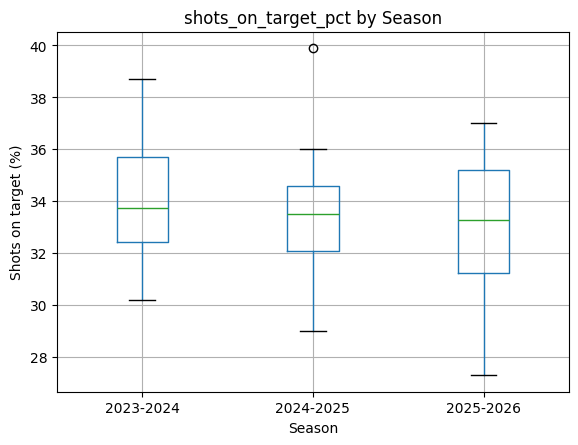

In [ ]:
plt.figure(figsize=(6, 4))
df.boxplot(
    column="shots_on_target_pct",
    by="season",
    grid=True
)

plt.title("shots_on_target_pct by Season")
plt.suptitle("")
plt.xlabel("Season")
plt.ylabel("Shots on target (%)")

plt.show()


* **Season 2023–2024**: The median `shots_on_target_pct` is relatively high with a moderate IQR, indicating fairly stable shooting accuracy across teams while still allowing for some variation. No clear outliers appear, suggesting a balanced distribution of shot-on-target rates.

* **Season 2024–2025**: The median is almost unchanged and the IQR tightens slightly, implying that finishing accuracy remains stable and more uniform across teams. An **upper outlier** appears, indicating one team achieves a standout shot-on-target rate relative to the league.

* **Season 2025–2026**: The median dips slightly and the spread expands toward lower values, suggesting more teams show weaker shooting accuracy than in the previous two seasons. There are **no obvious outliers**, but the wider dispersion indicates less stability in shot-on-target rates early in the season.


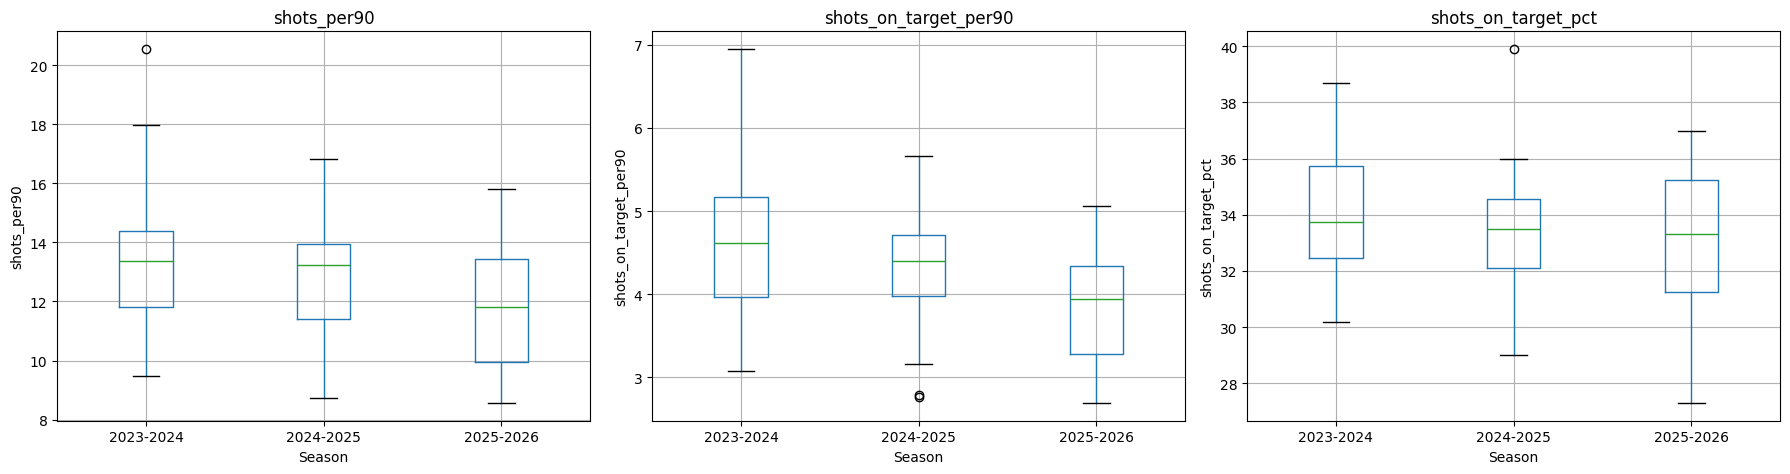

In [ ]:

cols = ["shots_per90", "shots_on_target_per90", "shots_on_target_pct"]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, col in zip(axes, cols):
    df.boxplot(column=col, by="season", ax=ax)
    ax.set_title(col)
    ax.set_xlabel("Season")
    ax.set_ylabel(col)

plt.suptitle("")

plt.tight_layout()
plt.show()


# Analysis by team (aggregated across multiple seasons)

In [ ]:
features = [
    "shots_per90",
    "shots_on_target_per90",
    "shots_on_target_pct"
]


In [ ]:
team_summary = (
    df
    .groupby("team")[features]
    .agg(["mean", "min", "max"])
    .round(3)
)

team_summary.columns = [f"{c}_{stat}" for c, stat in team_summary.columns]

team_summary


,shots_per90_mean,shots_per90_min,shots_per90_max,shots_on_target_per90_mean,shots_on_target_per90_min,shots_on_target_per90_max,shots_on_target_pct_mean,shots_on_target_pct_min,shots_on_target_pct_max
team,,,,,,,,,
Arsenal,15.263,14.32,17.03,5.017,4.68,5.50,32.933,32.3,33.8
Aston Villa,12.530,11.56,13.45,4.387,4.18,4.79,35.033,33.3,36.2
Bournemouth,14.053,12.87,15.11,4.753,4.60,5.05,33.900,32.5,35.8
Brentford,11.077,9.44,12.37,4.013,3.31,4.55,36.267,33.8,39.9
Brighton,13.920,13.31,14.61,4.760,4.25,5.21,34.133,31.9,35.7
Burnley,9.970,8.62,11.32,3.400,3.19,3.61,34.450,31.9,37.0
Chelsea,14.573,14.06,15.53,5.150,5.00,5.34,35.367,34.4,36.1
Crystal Palace,12.327,11.62,13.47,4.270,3.94,4.61,34.633,33.9,35.8
Everton,11.483,10.56,13.26,3.533,2.94,4.00,30.800,27.8,34.4


### 1) High-volume attacks (more shots)
- **Liverpool, Manchester City, Arsenal, Chelsea** lead in both `shots_per90_mean` and `shots_on_target_per90_mean`.
- **Liverpool** and **Manchester City** also show a wide **min–max range**, indicating higher “explosive” attacking peaks in certain seasons/periods.

### 2) Mid-tier attacking output
- **Tottenham, Brighton, Newcastle Utd, Bournemouth, Manchester Utd** sit around the league median for shot volume and shots on target.
- Their shooting intensity is fairly steady, but not clearly dominant.

### 3) Limited attacks (fewer shots)
- **Burnley, Sheffield Utd, Leicester City, Southampton, Sunderland, Ipswich Town** rank lowest in `shots_per90_mean` and `shots_on_target_per90_mean`.
- This aligns with more defensive styles or weaker attacking structure.

### 4) Finishing accuracy (shots_on_target_pct)
- Teams such as **Manchester City, Brentford, Chelsea, Aston Villa** post higher `shots_on_target_pct_mean`, indicating better accuracy—even when shot volume is not always the highest.
- In contrast, **Everton, Leeds United, Sunderland** have lower on-target rates, implying weaker finishing efficiency.

### 5) Consolidated conclusion
- The strongest teams typically combine **high shot volume** with **solid accuracy**, while weaker sides often shoot less and finish less efficiently.
- This makes shooting metrics a clear separator between **top contenders** and **lower-half teams**.


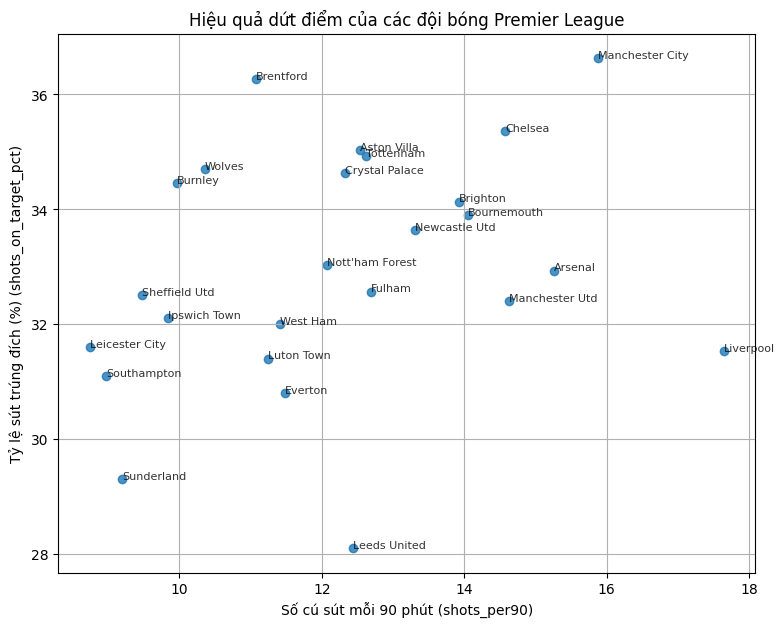

In [ ]:
plt.figure(figsize=(9, 7))

plt.scatter(
    team_summary["shots_per90_mean"],
    team_summary["shots_on_target_pct_mean"],
    alpha=0.8
)

# Label each team
for team_name, row in team_summary.iterrows():
    plt.text(
        row["shots_per90_mean"],
        row["shots_on_target_pct_mean"],
        team_name,
        fontsize=8,
        alpha=0.8
    )

plt.xlabel("Shots per 90 (shots_per90)")
plt.ylabel("Shot-on-target rate (%) (shots_on_target_pct)")
plt.title("Finishing profile of Premier League teams")

plt.grid(True)
plt.show()


### 1) Overall pattern
Teams form clear clusters, indicating a **weak/non-linear relationship** between shot volume and accuracy. Shooting more does not automatically mean a higher on-target rate—reflecting differences in attacking style and finishing quality.

### 2) Complete attacking profiles (high volume + high accuracy)
**Manchester City** and **Chelsea** sit in the upper-right, combining **high shooting intensity** with **high accuracy**. This is the most well-rounded and efficient shooting profile.

### 3) High volume, average efficiency
**Liverpool**, **Arsenal**, and **Manchester Utd** take many shots (`shots_per90_mean` high) but have only mid-level `shots_on_target_pct_mean`, suggesting **finishing quality does not fully match shot volume**.

### 4) Selective shooting, high accuracy
**Brentford**, **Aston Villa**, and **Crystal Palace** take a moderate/low number of shots but post a high on-target rate—indicating a more **selective, quality-first** approach.

### 5) Low efficiency group
Teams such as **Leeds United**, **Sunderland**, **Everton**, and **Southampton** cluster in the lower-left, showing both low shot volume and low accuracy—pointing to limitations in chance creation and finishing.

### 6) Notable cases
- **Manchester City** stands out as the clearest top performer on both dimensions.
- **Leeds United** is a notable low-efficiency case: very low on-target rate despite a not-too-low shot volume.

### 7) Consolidated conclusion
This scatter plot clearly separates teams by attacking style and effectiveness. Strong teams tend to rank high in **shot volume and/or accuracy**, while weaker teams concentrate in the opposite region—highlighting substantial gaps in attacking quality across the league.
